<a href="https://colab.research.google.com/github/AlexeySto/TerVer_seminar_9_DZ/blob/main/TerVer_seminar_9_DZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [122]:
import numpy as np
from sklearn.linear_model import LinearRegression


zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b = (len(zp)*np.sum(zp*ks) - np.sum(zp)*np.sum(ks))/(len(zp)*np.sum(zp**2) - np.sum(zp)**2)
a = np.mean(ks) - b*np.mean(zp)
print("Коэффициенты линейной регрессии без использования intercept:", a)

model = LinearRegression()
zp = zp.reshape(-1, 1)
model.fit(zp, ks)
a = model.intercept_
print("Коэффициенты линейной регрессии с использованием intercept:", a)


Коэффициенты линейной регрессии без использования intercept: 444.17735732435955
Коэффициенты линейной регрессии с использованием intercept: 444.1773573243595


2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Iterator =  0 B1 =  10.626254600000001 mse =  365578.4679061701
Iterator =  500 B1 =  6.586340931974558 mse =  63200.4494835986
Iterator =  1000 B1 =  6.586340931974558 mse =  63200.4494835986
Iterator =  1500 B1 =  6.586340931974558 mse =  63200.4494835986
Iterator =  2000 B1 =  6.586340931974558 mse =  63200.4494835986


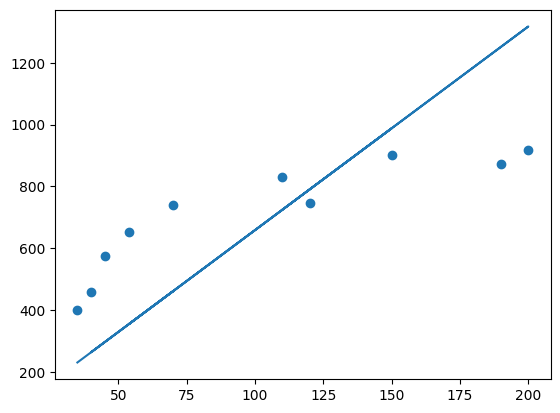

In [49]:
import numpy as np
import matplotlib.pyplot as plt


zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

def mse_(B1, y=ks, x=zp, n=len(zp)):
  return np.sum((B1*x - y)**2)/n

alpha = 1e-5

B1 = 0.1
n = len(zp)

for i in range(2001):
  B1 -= alpha*(2/n) * np.sum((B1*zp - ks) * ks)
  if i % 500 == 0:
    print("Iterator = ", i ,"B1 = ", B1, "mse = ", mse_(B1))

plt.scatter(zp, ks);
plt.plot(zp, B1 * zp);

3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Iterator =  0 B0 =  444.001736 B1 =  2.735004 mse =  6646.8728923383605
Iterator =  5000 B0 =  444.02961010627365 B1 =  2.621626367250676 mse =  6470.41973848898
Iterator =  10000 B0 =  444.053646861673 B1 =  2.621449446103676 mse =  6470.418083335113
Iterator =  15000 B0 =  444.07377311630074 B1 =  2.6213013079712875 mse =  6470.416922922041
Iterator =  20000 B0 =  444.0906250631903 B1 =  2.621177270191507 mse =  6470.416109367173
Iterator =  25000 B0 =  444.10473539415995 B1 =  2.6210734119170342 mse =  6470.415538991378
Iterator =  30000 B0 =  444.11655013825794 B1 =  2.620986450176875 mse =  6470.415139106184
Iterator =  35000 B0 =  444.1264427607886 B1 =  2.6209136361012697 mse =  6470.414858750373
Iterator =  40000 B0 =  444.13472596859964 B1 =  2.6208526680295634 mse =  6470.414662195512
Iterator =  45000 B0 =  444.1416615947579 B1 =  2.620801618754623 mse =  6470.414524392711
Iterator =  50000 B0 =  444.14746887514264 B1 =  2.620758874603445 mse =  6470.414427780444
Iterator = 

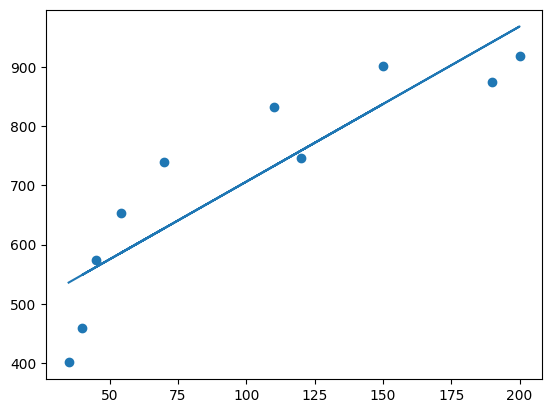

In [131]:
import numpy as np
import matplotlib.pyplot as plt


zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

def mse_(B1, B0, y=ks, x=zp, n=len(zp)):
  return np.sum((B1*x + B0 - y)**2)/n

alpha = 7 * 1e-5

B0 = 444
B1 = 2.5
temp = B0
n = len(zp)

for i in range(100001):
    temp -= alpha * (2/n) * np.sum(B1*zp + B0 - ks)
    B1 -= alpha * (2/n) * np.sum((B1*zp + B0 - ks) * zp)
    B0 = temp
    if i % 5000 == 0:
      print("Iterator = ", i ,"B0 = ", B0,"B1 = ", B1, "mse = ", mse_(B1, B0))

plt.scatter(zp, ks);
plt.plot(zp, B1 * zp + B0);